# Práctica 1
### Método de rechazo
El método de rechazo se basa en la generación de puntos aleatorios dentro de un área especifica siguiendo una distribución uniforme,
descartando aquellos que estén por encima de la curva de distribución estudiada. Formalmente, todos los puntos ($x_{n}$, $y_{n}$) tales que
($y_{n}$ > $f(x)$), siendo $f(x)$ la función de distribución de la que queremos generar valores. Para aquellos puntos aceptados, se toma
la coordenada x obteniendo así los números deseados.
Un ejemplo es mostrado en la figura posterior, donde se han generado puntos aleatorios en el rango (x=[0,1], y=[0,3]). Todos aquellos puntos
por encima de la curva de función de densidad son rechazados (rojo) mientras que el resto son aceptados (azul).

<img src="docs/accept-reject.png" width="300" height="300">

### Ziggurat Algorithm
El **algoritmo de Ziggurat** es un algoritmo utilizado para generar valores aleatorios a partir de una distribucción
de probabilidad monótona decreciente. Sin embargo, también puede ser aplicada a distribuciones unimodales simétricas,
como la distribución normal, generando un valor para la mitad decreciente de la función y  eligiendo aleatoriamente su signo.
Este algoritmo fue desarrollado por George Marsaglia et all en la década de 1960 y surge como una mejora del método de rechazo.

Este algoritmo basado en el método de rechazo, intenta mejorar algunas carencias del método de rechazo como son minimizar el número de valores
descartados por el método de rechazo. Esto lo conseguirá modificando el área de generación de punntos de tal manera que sea lo más parecida
posible. 

Para conseguir este objetivo, se cubre la distribución de probabilidad estudiada de rectángulos de mismo área apilados en tamaño decreciente. Por tanto, para generar números elegimos uniformemente una de las regiones y aplicamos el método del rechazo en esa región.

Para la generación de los rectángulos, se divide el área bajo la curva de la función de densidad $f(x)$ en $n$ secciones con m = $n-1$ rectángulos  y una cola. Dada una sucesión
creciente $x_{k}$ = ($x_{0}=0$,....$x_{m}$), se forman los rectángulos de manera iterativa de la siguiente manera: Para un rectángulo r, su esquina superior izquierda tomará coordenadas (0,$f(x_{r-1})$) y su esquina inferior derecha tomará coordenadas ($x_{r}$,$f(x_{r})$). Por último, se define la cola como los puntos bajo la curva con ordenada inferior $f(z_{m})$.
El cálculo del área de los m rectángulos y elección de los $x_{k}$ puede no ser algo trivial ya que depende de la función de densidad a estudiar, resultando en la necesidad de la resolucón matemática de una ecuación trascendente. En particular, para la función de densidad de una distribucción normal se establece que para n = 6 secciones, $x_{m}$ = 2.18, mientras que para n = 256 secciones, $x_{m}$ = 3.6542
Por otro lado, es posible dividir los rectángulos en dos porciones horizontalmente,  la porción (generalmente más grande) de $0$ a $x_(k-1)$ que está completamente contenida dentro de la distribución deseada y llamamos porción central del Ziggurat, y la porción (pequeña) de $x_(k-1)$ a $x_k$, que está solo parcialmente contenida. De esta manera, se puede calcular $σ_k=x_(k-1)/x_k$, que es la fracción de las longitudes de las dos capas de rectángulos adyacentes en dirección horizontal.

<img src="docs/ziggurat_example.png" width="300" height="300">

En la figura se puede observar como se ha dividido el área bajo la curva en 6 secciones siendo 5 rectángulos y la cola, donde además se puede observar como la línea de puntos discontinua representa el límite entre las porciones centrales y pequeñas de las secciones. 


Una vez determinado los valores de la sucesión $x_{k}$ y correspondientes $σ_{k}$, el algoritmo calcula un entero aleatorio $e1$, entre $1$ y $n$, con distribución uniforme para elegir una región y un número real aleatorio $e2$, distribuido uniformemente entre $−1$ y $1$. Luego comprobamos para ver si $e2 < σ_{e1}$, es decir si $e2$ cae en la porción central de la sección $e1$. Si es así, entonces sabemos que $e2*z_{e1}$ es la coordenada $x$ de un punto debajo de la función de densidad de probabilidad y este valor se puede devolver como una muestra de la distribución



### Comparación con otros métodos
**Método de rechazo**: Plantea el problema mencionado con anterioridad del elevado número de puntos rechazados durante el proceso de generación.

**Método de inversión**: Para poder utilizar este método, es necesario conocer la función de distribución para poder computar su inversa. Esto puede resultar posible para algunas distribuciones como la uniforme o la exponencial, pero en el caso de distribucciones como la beta este cómputo puede resultar muy costoso y es necesario disponer de una aproximación como es el caso de la distribucción normal, lo cuál afectará a la calidad de los resultados generados.

**Box-Muller**:Es un algoritmo basado en el método de transformación que se caracteriza por una alta eficiencia y un proceso de cálculo relativamente simple (solo se utilizan funciones elementales, donde la computación de las funciones de seno y coseno se pueden hacer en un solo paso), que requieren al menos un logaritmo y un cálculo de raíz cuadrada para los valores generados.

**Método recursivo (Wallace)**: Este método se basa en la propiedad de que combinaciones lineales de números aleatorios en una distribución gaussiana están distribuidos sobre una gaussiana de manera propia, evitando así la computación de funciones elementales. Por tanto, este método consigue reducir bastante el tiempo de ejecución necesario, pero con el incoveniente de ajustar de una manera precisa los parámetros del algoritmo.

Esto se puede apreciar en el artículo Gaussian Random Number Generators (Thomas et al. (2007)), donde se obtiene el mayor rendimiento cuando el parámetro de calidad toma el valor más bajo. En cambio, el método de Ziggurat, a pesar de no reportar tiempos tan rápidos, tiene mejores propiedad estadísticas con respecto a la correlación.


## Generación de la tabla para la distribución normal estándar

**La función de densidad (FDP)** describe la probabilidad relativa de que una variable aleatoria tomará determinado valor.
Para una distribución normal $N(μ,σ^2)$, su función de densidad se define como:
 $f(x|\mu,\sigma^2) = \frac{1}{ \sqrt{(2 \pi \sigma^2}} \, e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$ 
 
Esta ecuación se puede simplificar tomando la distribución normal estándar de media μ = 0 y desviación estándar σ = 1:
 $f(x) = \frac{1}{ \sqrt{(2 \pi}} \, e^{-\frac{(x^2)}{2}}$

**La función de distribución (FDA)** describe la probabilidad de que una variable aleatoria caiga dentro de un rango de valores determinado, en lugar de tomar un valor cualquiera. Esta probabilidad viene dada por la integral de la FDP de esta variable sobre ese rango, es decir, viene dada por el área bajo la función de densidad pero por encima del eje horizontal y entre los valores más bajos y más altos del rango. La función de densidad de probabilidad es no negativa en todas partes, y el área bajo la curva completa es igual a 1. Para la distribución normal estándar, la FDA se puede definir como: 
$\int_{0}^{z}{\frac{1}{2\pi}}e^{\frac{-x^2}{2}}dx$


**La tabla de distribución normal estándar**, es una tabla matemática de los valores de la función de distribución acumulativa de la distribución normal. Se utiliza para determinar la probabilidad de que se observe una muestra estadística por debajo, por encima o entre dos valores dados de una distribución normal estándar, y por extensión, de cualquier distribución normal.

Para generar los valores de la tabla para la distribución normal utilizaremos el algoritmo de Ziggurat explicado en los apartados anteriores para generar n números aleatorios. En particular, generaremos 20000 números, siendo truncados a dos decimales. Posteriormente, calculamos el número de veces que aparece cada valor, obteniendo así su frecuencia de aparición. Con el objetivo de obtener la probabilidad acumulada dentro de un rango desde 0 hasta un valor x del numero aleatorio, se suman todas las frecuencias calculadas de los valores de los números menores que x.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import default_rng

In [2]:
def pdf_standard_normal_distribution(x):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp((x ** 2) / -2)

In [3]:
'''
Created on 22.12.2021

@author: rsadykhov 
'''
class Ziggurat_Algorithm:
    
    def __init__(self, sample, regions, nbins, max_i=1000):
        self.sample = sample
        self.regions = regions
        self.nbins = nbins
        self.max_i = max_i
    
    def ziggurat(self):
        
        rng = default_rng()
        
        X_0 = 0
        limit = 6
        rectangle_size = 1/(self.regions)
        X = np.array([])
        dX = 0.001
        current_x = X_0
        current_area, rectangle_length = 0, 0
        Z = np.ones(self.sample)
        
        while current_x < limit:
            rectangle_length = rectangle_length+dX
            current_area = ((1/np.sqrt(2*math.pi))*np.exp(-0.5*(current_x**2))-
                            (1/np.sqrt(2*math.pi))*np.exp(-0.5*(rectangle_length**2)))*rectangle_length
            if current_area > rectangle_size:
                X = np.append(X, rectangle_length)
                current_x = rectangle_length
        
        Y = (1/np.sqrt(2*math.pi))*np.exp(-0.5*(X**2))
        
        for j in range(self.sample):
            num = 0
            while (Z[j]==1) and num<self.max_i:
                i = np.random.randint(0, len(X))
                u0 = rng.uniform(-1,1)
                u1 = rng.uniform()
                x = u0*X[i]
                if abs(x)<X[i-1]:
                    Z[j] = x
                else:
                    y = Y[i]+u1*(Y[i-1]-Y[i])
                    point = (1/np.sqrt(2*math.pi))*np.exp(-0.5*(x**2))
                    if y<point:
                        Z[j] = x
                num = num+1
        
        return Z

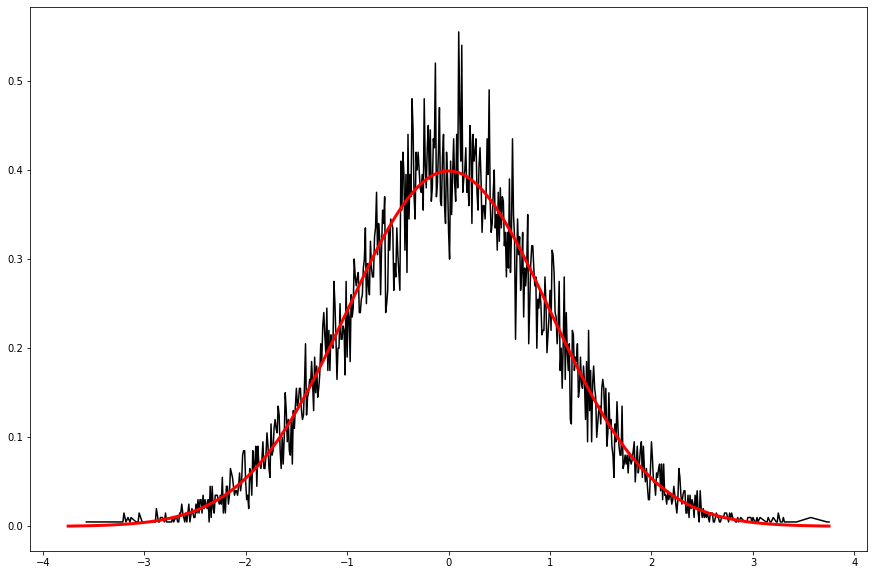

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.50105,0.50405,0.50815,0.51165,0.5156,0.51995,0.5238,0.52745,0.53185,0.53565
0.1,0.5412,0.54585,0.54995,0.55535,0.5591,0.563,0.567,0.57125,0.575,0.5789
0.2,0.5825,0.587,0.5913,0.5947,0.5991,0.6032,0.6074,0.61175,0.6155,0.61905
0.3,0.6231,0.62735,0.63125,0.63455,0.63815,0.64175,0.6452,0.64895,0.6533,0.65725
0.4,0.66215,0.6658,0.6691,0.6725,0.67625,0.68025,0.6836,0.6871,0.6902,0.69395
0.5,0.69715,0.70095,0.7043,0.708,0.71165,0.7148,0.7181,0.7209,0.7242,0.7271
0.6,0.731,0.73385,0.73715,0.7415,0.745,0.74825,0.75035,0.7532,0.75665,0.7597
0.7,0.76295,0.7656,0.76845,0.77175,0.7741,0.777,0.7797,0.7826,0.7861,0.78815
0.8,0.79065,0.7936,0.79675,0.7999,0.8028,0.8055,0.8083,0.8103,0.81285,0.8153
0.9,0.81795,0.82045,0.8226,0.8248,0.827,0.8298,0.8323,0.83425,0.8364,0.83875


In [4]:

FIGURE_SIZE = (15, 10)

N_samples = 20000
data = Ziggurat_Algorithm(N_samples, 256, 100).ziggurat()
dict_counter = {}
for random_number in data:
    number = np.round(random_number,2)
    dict_counter[number] = dict_counter.get(number, 0) + 1

x_axis = sorted(list(dict_counter.keys()))
y_axis = list(map(lambda x : dict_counter[x] / N_samples * 100, x_axis))

domain = np.linspace(-max(x_axis), max(x_axis), N_samples)

fig, ax = plt.subplots(figsize = (FIGURE_SIZE[0], FIGURE_SIZE[1]))

ax.plot(x_axis, y_axis, color = 'black')

ax.plot(domain, list(
    map(
        lambda x: pdf_standard_normal_distribution(x), 
        domain
    )
), color = 'r', linewidth = 3)

plt.show()



standard_normal_table = pd.DataFrame(
    data =[],
    index = np.round(np.arange(0, 1, .1), 2),
    columns = np.round(np.arange(0.00, .1, .01), 2)
)


for row in standard_normal_table.index:
    for column in standard_normal_table.columns:
        cell = np.round(row+column, 2)
        value = 0
        for elem in np.round(np.arange(min(data), cell, .01), 2):
            if dict_counter.get(elem) is not None:
                value = value + dict_counter.get(elem)
        standard_normal_table.loc[row, column] = value / N_samples
standard_normal_table.columns = [str(column).ljust(4, '0') for column in standard_normal_table.columns]
standard_normal_table
